# 新店铺类型分类

- seller_34 为新的A类商户
- seller_1  为新的B类商户

In [36]:
import numpy as np
import pandas as pd

import seaborn as sns  
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(font_scale=1.5)
mpl.rcParams["font.sans-serif"]=["SimHei"]#展示中文字体
mpl.rcParams["axes.unicode_minus"]=False#处理负刻度值



In [2]:
data_raw = pd.read_excel("data/附件1-商家历史出货量表.xlsx")
product_type_raw = pd.read_excel("data/附件2-商品信息表.xlsx")
storage_type_raw = pd.read_excel("data/附件4-仓库信息表.xlsx")
seller_type_raw = pd.read_excel("data/附件3-商家信息表.xlsx")
new_data_raw = pd.read_excel("data/附件5-新品历史出货量表.xlsx")

In [3]:
data = data_raw.copy()
data_new = new_data_raw.copy()
data["qty"] = data["qty"].where(data["qty"] <= 200, 200)
data_new["qty"] = data_new["qty"].where(data["qty"] <= 200, 200)
product_type = product_type_raw.set_index("product_no")
storage_type = storage_type_raw.drop_duplicates(keep='first').set_index("warehouse_no")
seller_type = seller_type_raw.set_index("seller_no")
seller_type["mixed type"] = seller_type["inventory_category"]+" "+seller_type["seller_level"]
seller_type.head()

,seller_category,inventory_category,seller_level,mixed type
seller_no,,,,
seller_1,居家生活,B,New,B New
seller_2,厨具,A,Large,A Large
seller_3,厨具,A,Large,A Large
seller_4,家居日用,A,Large,A Large
seller_5,家居日用,B,Large,B Large


In [4]:
seller_data = data.groupby(['seller_no','product_no','date']).mean()
seller_data

qty
seller_no product_no   date             
seller_10 product_1664 2022-12-01   0.00
                       2022-12-02   0.00
                       2022-12-03   0.00
                       2022-12-04   0.50
                       2022-12-05   0.00
...                                  ...
seller_9  product_96   2023-05-11   8.00
                       2023-05-12  10.25
                       2023-05-13   7.50
                       2023-05-14  12.00
                       2023-05-15  11.50

[201192 rows x 1 columns]

### seller_34

In [5]:
seller_A = seller_type[(seller_type["inventory_category"] == 'A')]
seller_A = seller_A[~seller_A.index.isin(['seller_34'])]
seller_A

,seller_category,inventory_category,seller_level,mixed type
seller_no,,,,
seller_2,厨具,A,Large,A Large
seller_3,厨具,A,Large,A Large
seller_4,家居日用,A,Large,A Large
seller_6,玩具乐器,A,Medium,A Medium
seller_10,手机通讯,A,Large,A Large
seller_11,食品饮料,A,Large,A Large
seller_17,美妆护肤,A,Special,A Special
seller_28,宠物健康,A,Large,A Large
seller_32,家装建材,A,Large,A Large


In [6]:
seller_34 = data_new[data_new["seller_no"]=="seller_34"]
seller_34 = seller_34.groupby(['seller_no','date']).mean()
seller_34.head()

qty
seller_no date           
seller_34 2023-04-03  1.0
          2023-04-04  0.0
          2023-04-05  0.0
          2023-04-06  0.0
          2023-04-07  0.5

A Large


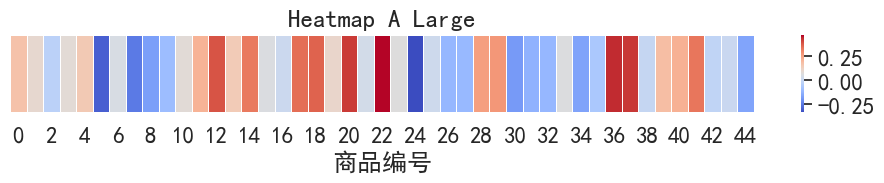

A Medium


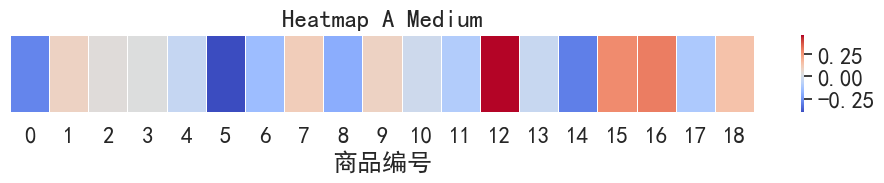

A Special


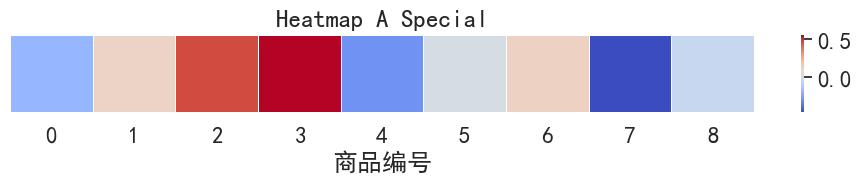

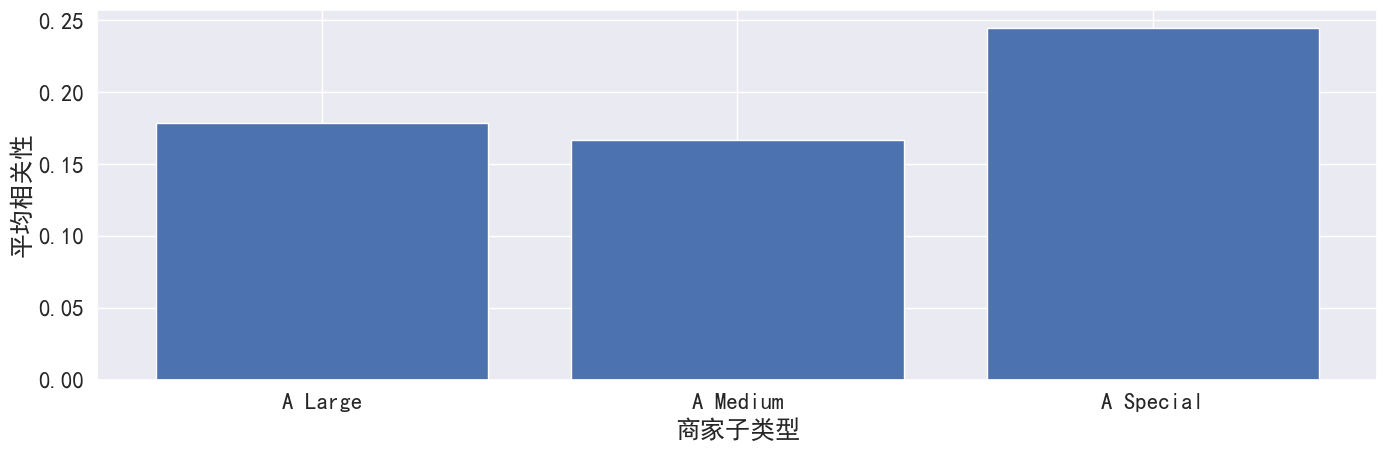

In [37]:
import random


num = 50
seller_34_list = []
type_list = []

for seller_types, df in seller_A.groupby("mixed type"):
    print(seller_types)
    
    local_data = seller_data.loc[df.index].reset_index().set_index("product_no")
    
    rand_prod = np.random.choice(local_data.index, num)
    local_data = local_data.loc[rand_prod][["date","qty"]]
    local_data = local_data.reset_index().set_index(["product_no","date"])
        
    duplicates = local_data.index.duplicated(keep='first')
    
    local_data = local_data[~duplicates].unstack(level=0).fillna(0)
    local_data = local_data.truncate(before = "2023-04-03")
    
    local_data["34"] = seller_34.values

    corr = local_data.corr()
    plt.figure(figsize=(12, 1))  # 设置每张图的尺寸
    sns.heatmap([corr["34"][:-1]], annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Heatmap {seller_types}')  # 添加标题
    plt.xlabel("商品编号")
    #plt.xlabel('商品')
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    
    plt.show()  # 显示图表
    
    seller_34_list += [np.mean(np.abs([corr["34"][:-1]]))]
    type_list += [seller_types]

plt.xlabel("商家子类型")
plt.ylabel("平均相关性")
plt.bar(type_list, seller_34_list)
plt.subplots_adjust(left=0, right=2)

####  seller_34 应当归类于 A Special

### seller_1

In [8]:
seller_B = seller_type[(seller_type["inventory_category"] == 'B')]
seller_B = seller_B[~seller_B.index.isin(['seller_1'])]
seller_B

,seller_category,inventory_category,seller_level,mixed type
seller_no,,,,
seller_5,家居日用,B,Large,B Large
seller_7,手机通讯,B,Large,B Large
seller_9,手机通讯,B,Medium,B Medium
seller_12,食品饮料,B,Large,B Large
seller_13,食品饮料,B,Special,B Special
seller_15,美妆护肤,B,Large,B Large
seller_16,个人护理,B,Large,B Large
seller_18,美妆护肤,B,Small,B Small
seller_21,电脑、办公,B,Special,B Special


In [9]:
seller_1 = data_new[data_new["seller_no"]=="seller_1"]
seller_1 = seller_1.groupby(['seller_no','date']).mean()
seller_1.head()

qty
seller_no date                
seller_1  2023-04-01  2.333333
          2023-04-02  1.000000
          2023-04-03  0.750000
          2023-04-04  0.250000
          2023-04-05  0.600000

B Large


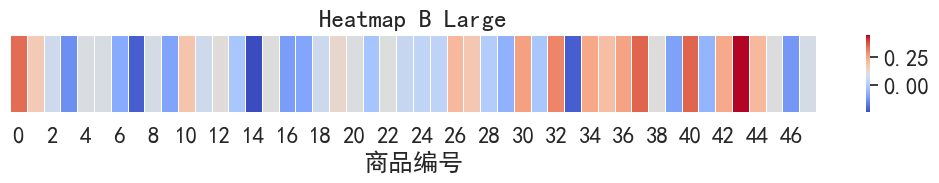

B Medium


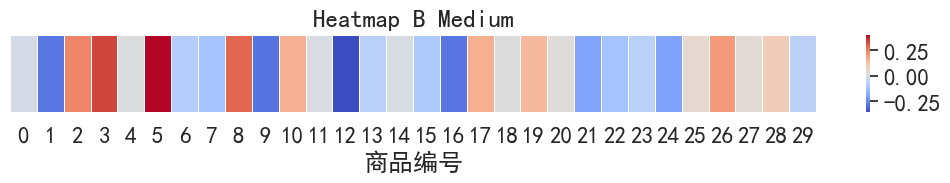

B Small


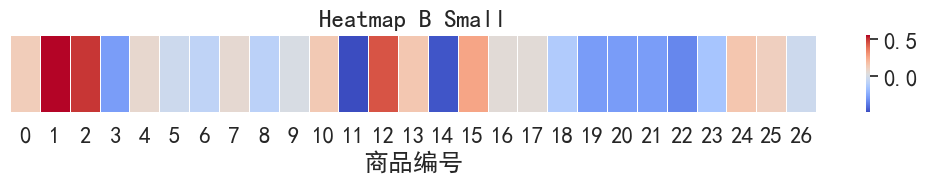

B Special


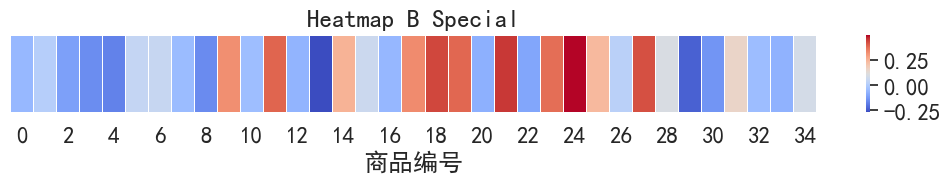

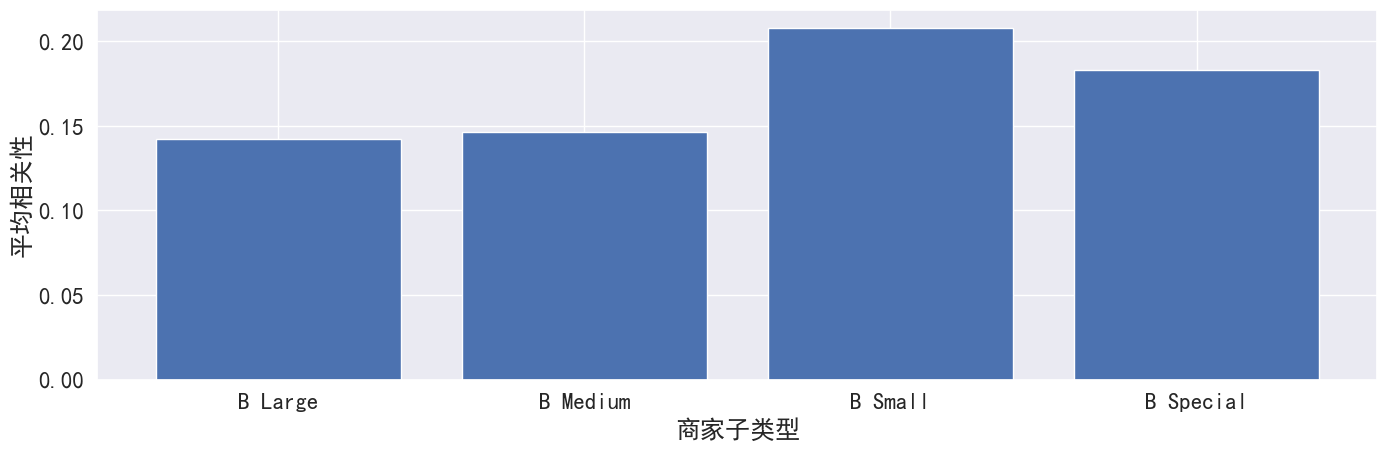

In [34]:
import random


num = 50
seller_1_list = []
type_list = []


for seller_types, df in seller_B.groupby("mixed type"):
    print(seller_types)
    
    local_data = seller_data.loc[df.index].reset_index().set_index("product_no")
    
    rand_prod = np.random.choice(local_data.index, num)
    local_data = local_data.loc[rand_prod][["date","qty"]]
    local_data = local_data.reset_index().set_index(["product_no","date"])
        
    duplicates = local_data.index.duplicated(keep='first')
    
    local_data = local_data[~duplicates].unstack(level=0).fillna(0)
    local_data = local_data.truncate(before = "2023-04-01")
    
    local_data["1"] = seller_1.values

    corr = local_data.corr()
    plt.figure(figsize=(13, 1))  # 设置每张图的尺寸
    sns.heatmap([corr["1"][:-1]], annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Heatmap {seller_types}')  # 添加标题
    plt.xlabel("商品编号")
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.show()  # 显示图表
    
    seller_1_list += [np.mean(np.abs([corr["1"][:-1]]))]
    type_list += [seller_types]
    
plt.bar(type_list, seller_1_list)
plt.xlabel("商家子类型")
plt.ylabel("平均相关性")
plt.subplots_adjust(left=0, right=2)

####  seller_1 应当归类于 B Small